# Finding the Eigenvalues and Eigenvectors of a Matrix

## (a)

In [3]:
import numpy as np

# Define matrix A
A = np.array([[4, 0, 1],
              [-1, -6, -2],
              [5, 0, 0]])

# Define vector v
v = np.array([1, 2, 3])

# Compute Av
Av = A @ v

# Check if Av is a scalar multiple of v
is_eigenvector = np.allclose(Av / v, Av[0] / v[0]) if np.all(v != 0) else False

# Output results
print("A * v =", Av)
print("Is v an eigenvector of A?", is_eigenvector)

A * v = [  7 -19   5]
Is v an eigenvector of A? False


## (b)

In [5]:
v = np.array([0, 1, 0])

# Compute Av
Av = A @ v

# Check if Av is a scalar multiple of v
is_eigenvector = np.allclose(Av / v, Av[1] / v[1]) if np.all(v != 0) else np.all(Av == 0)

# Output results
print("A * v =", Av)
print("Is v an eigenvector of A?", is_eigenvector)

A * v = [ 0 -6  0]
Is v an eigenvector of A? False


## (c)

In [7]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Output results
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [-6.  5. -1.]

Eigenvectors:
 [[ 0.          0.69431384 -0.18493168]
 [ 1.         -0.18935832 -0.33287702]
 [ 0.          0.69431384  0.9246584 ]]


# Principal Component Analysis

## (a)

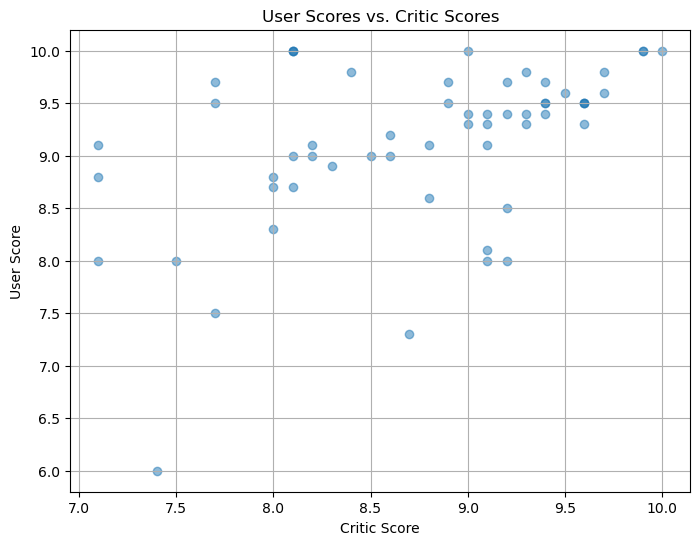

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\Weekseey\Documents\Bellevue Work\Math for Data Science\week9data\video_game_data.csv")

# Scatter plot of User Scores vs. Critic Scores
plt.figure(figsize=(8, 6))
plt.scatter(data["critic_score"], data["user_score"], alpha=0.5)
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.title("User Scores vs. Critic Scores")
plt.grid(True)
plt.show()

## (b)

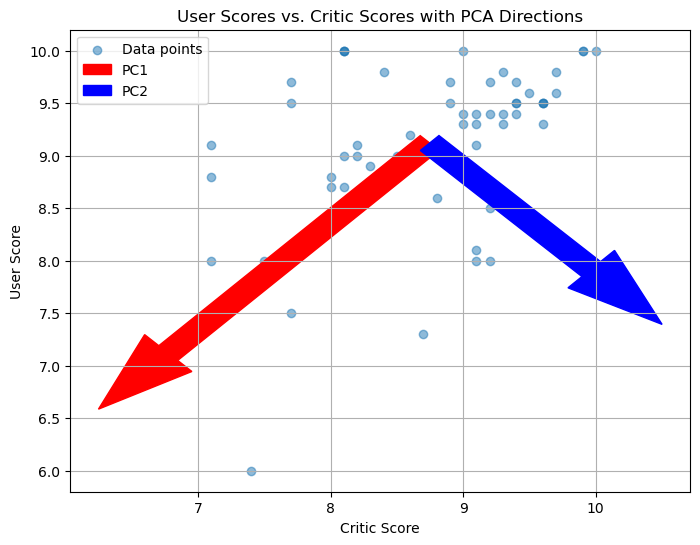

In [12]:
from sklearn.decomposition import PCA

# Extract relevant columns
X = data[["critic_score", "user_score"]].dropna().values  # Remove NaNs

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)

# Get principal component vectors
mean = np.mean(X, axis=0)
components = pca.components_
explained_variance = pca.explained_variance_

# Plot scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Data points")

# Plot principal component directions
for i, (comp, var) in enumerate(zip(components, explained_variance)):
    comp_vector = comp * np.sqrt(var) * 3  # Scale for visibility
    plt.arrow(mean[0], mean[1], comp_vector[0], comp_vector[1], 
              color='red' if i == 0 else 'blue', width=0.2, head_width=0.5, label=f"PC{i+1}")

plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.title("User Scores vs. Critic Scores with PCA Directions")
plt.legend()
plt.grid(True)
plt.show()